In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,GlobalAveragePooling2D

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator as Imgen

from PIL import Image

In [2]:
pip install split-folders --quiet

Note: you may need to restart the kernel to use updated packages.


In [3]:
import splitfolders
splitfolders.ratio("C:\\Users\\Raj-PC\\Dropbox\\PC\\Downloads\\archive (3)\\data",output='splitted',ratio=(0.8,0.1,0.1))

Copying files: 17760 files [02:13, 132.73 files/s]


In [4]:
train_ds = Imgen(rescale=1./255).flow_from_directory(
    "./splitted/train",
    seed = 1,
    target_size = (150,150),
    batch_size = 32
)

val_ds = Imgen(rescale=1./255).flow_from_directory(
    "./splitted/val",
    seed = 1,
    target_size = (150,150),
    batch_size = 32
)

test_ds = Imgen(rescale=1./255).flow_from_directory(
    "./splitted/test",
    seed = 1,
    target_size = (150,150),
    batch_size = 32
)

Found 14207 images belonging to 2 classes.
Found 1775 images belonging to 2 classes.
Found 1778 images belonging to 2 classes.


In [5]:
train_ds.class_indices

{'non-vehicles': 0, 'vehicles': 1}

In [6]:
x_train,y_train = next(train_ds)
print(x_train.shape,y_train.shape)

(32, 150, 150, 3) (32, 2)


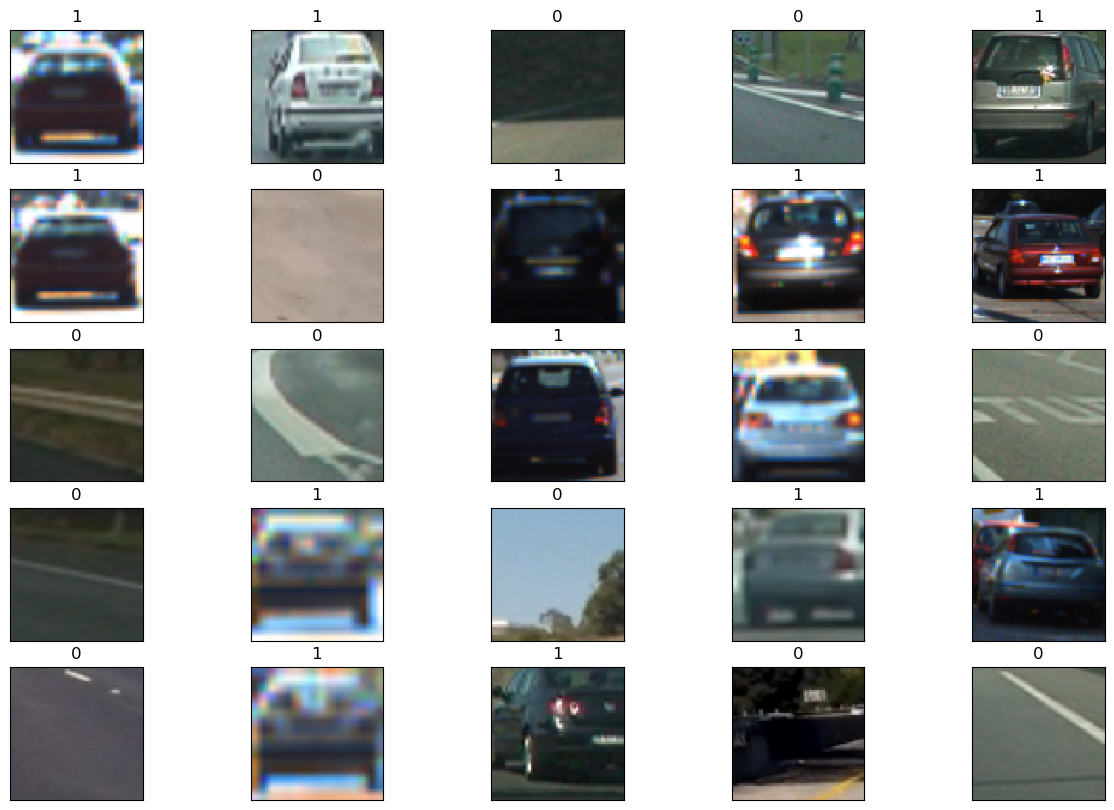

In [7]:
plt.figure(figsize=(15,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(np.argmax(y_train[i]))

In [8]:
from keras.applications.xception import Xception

In [9]:
base_model = Xception(weights='imagenet',
                     input_shape=(150,150,3),
                      include_top=False
                     )
base_model.trainable = False

In [10]:
model = keras.models.Sequential()

model.add(base_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(2,activation='relu'))

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ ?                      │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

In [12]:
model.compile(optimizer='sgd',loss=keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

In [13]:
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)

In [14]:
#training the model
hist = model.fit(train_ds,
                 epochs=10,
                 validation_data=val_ds,
                 callbacks=[callback]
                )

Epoch 1/10


C:\Users\Raj-PC\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


444/444 ━━━━━━━━━━━━━━━━━━━━ 698s 2s/step - accuracy: 0.9076 - loss: 0.5136 - val_accuracy: 0.9944 - val_loss: 0.4021
Epoch 2/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 680s 2s/step - accuracy: 0.9928 - loss: 0.3956 - val_accuracy: 0.9944 - val_loss: 0.3860
Epoch 3/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 742s 2s/step - accuracy: 0.9929 - loss: 0.3841 - val_accuracy: 0.9949 - val_loss: 0.3795
Epoch 4/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 726s 2s/step - accuracy: 0.9961 - loss: 0.3761 - val_accuracy: 0.9949 - val_loss: 0.3750
Epoch 5/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 728s 2s/step - accuracy: 0.9950 - loss: 0.3742 - val_accuracy: 0.9955 - val_loss: 0.3725
Epoch 6/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 718s 2s/step - accuracy: 0.9952 - loss: 0.3707 - val_accuracy: 0.9955 - val_loss: 0.3704
Epoch 7/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 774s 2s/step - accuracy: 0.9948 - loss: 0.3696 - val_accuracy: 0.9955 - val_loss: 0.3689
Epoch 8/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 2142s 5s/step - accuracy: 0.9956 - loss: 0.3672 - val_accuracy: 0.99

In [15]:
#test
model.evaluate(test_ds)

56/56 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.9953 - loss: 0.3681


[0.3661877512931824, 0.9966254234313965]

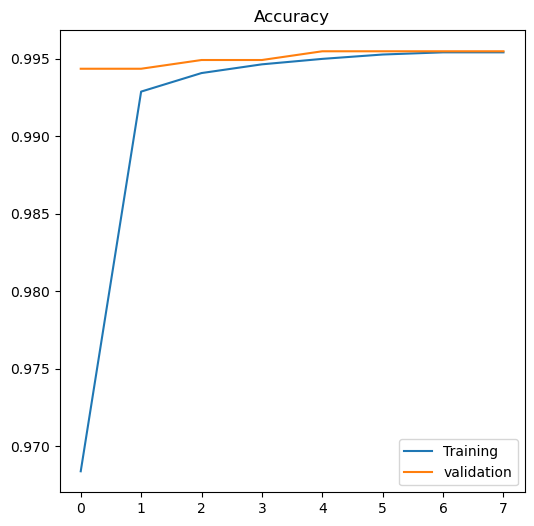

In [16]:
plt.figure(figsize=(6,6))

plt.plot(hist.epoch,hist.history['accuracy'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()
plt.show()

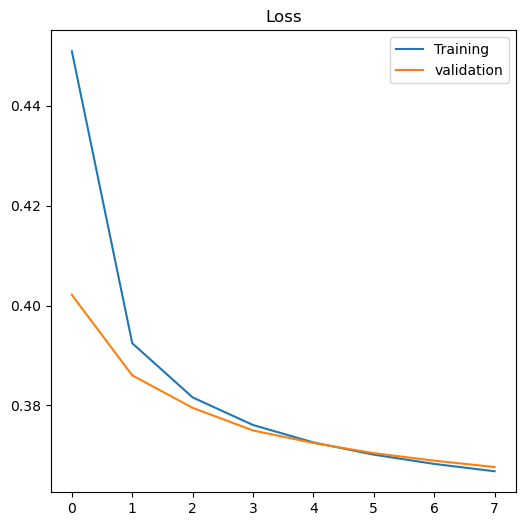

In [17]:
plt.figure(figsize=(6,6))

plt.plot(hist.epoch,hist.history['loss'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()

In [18]:
x_test,y_test = next(test_ds)

In [19]:
pred_test = model.predict(x_test)
pred_test = [np.argmax(i) for i in pred_test]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [20]:
test_dict = test_ds.class_indices
li_pred = list(test_dict.keys())
li_pred

['non-vehicles', 'vehicles']

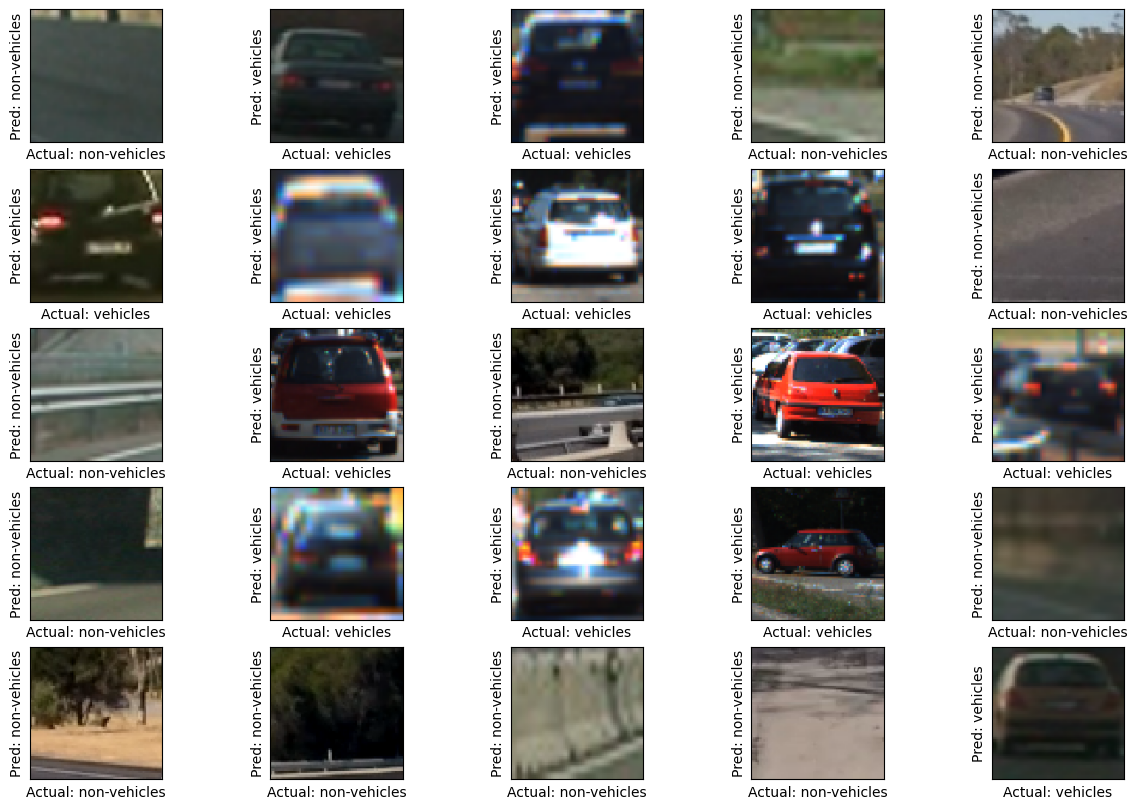

In [21]:
plt.figure(figsize=(15,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i])
    plt.xlabel("Actual: {}".format(li_pred[np.argmax(y_test[i])]))
    plt.ylabel("Pred: {}".format(li_pred[pred_test[i]]))

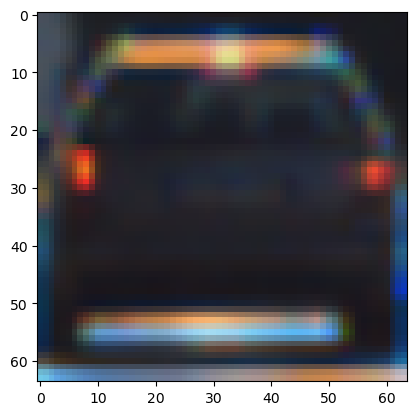

In [22]:
plt.imshow(Image.open("C:\\Users\\Raj-PC\\Dropbox\\PC\\Downloads\\archive (3)\\data\\vehicles\\10.png"));

In [23]:
def predict_image(dir):
    img = image.load_img(dir,target_size=(150,150))
    img  = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    
    pred_img = model.predict(img)
    
    return li_pred[np.argmax(pred_img)]

In [24]:
print(predict_image("C:\\Users\\Raj-PC\\Dropbox\\PC\\Downloads\\archive (3)\\data\\vehicles\\10.png"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
vehicles
